In [1]:
from mma import *
import gudhi as gd
import matplotlib.pyplot as plt
from multipers import *
from sklearn.neighbors import KernelDensity
from numpy.polynomial.polynomial import polyfit
from numpy import poly1d
from benchmark_functions import *
import numpy as np
from tqdm import tqdm

# Complexity wrt the number of simplices at fixed dimension

In [2]:
size = 50
min_npts = 5
max_npts = 500
dim=4

In [3]:
box = [[0 for _ in range(dim)], [1 for _ in range(dim)]]
time=[]
nsimp=[]
precision = 0.5
for i in tqdm(range(size)):
    npts = np.random.randint(low=min_npts, high = max_npts)
    X = np.random.uniform(low=0, high=2, size=[npts,2])
    simplextree = gd.AlphaComplex(points=X).create_simplex_tree()
    nsimp.append(simplextree.num_simplices())
    filtration = [np.random.uniform(low=0, high=0.9, size=npts) for _ in range(dim)]
    time.append(time_approx(simplextree, filtration, precision, box))

100%|███████████████████████████████████████████| 50/50 [00:13<00:00,  3.69it/s]


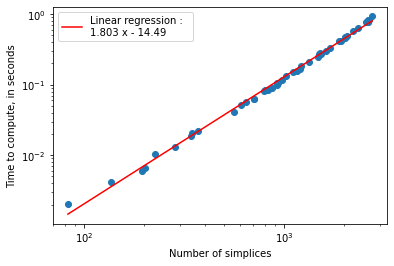

In [4]:
plt.scatter(nsimp,time)
poly = np.poly1d(np.polyfit(np.log(nsimp),np.log(time),1))
x = np.linspace(np.min(nsimp),np.max(nsimp))
y = np.exp(poly(np.log(x)))
plt.loglog(x,y, color='r', label="Linear regression : {}".format(poly))
plt.xlabel("Number of simplices")
plt.ylabel("Time to compute, in seconds")
plt.legend()
plt.show()

As we expected, at fixed dimension, the complexity wrt the number of simplices is between linear and cubic depending on the input.

# Warning, number of lines is NOT fixed, and grows exponentially to keep precision fixed.

# Complexity of dimension with respect to precision.

In [5]:
npts = 300
X = np.random.uniform(low=0, high=2, size=[npts,2])
simplextree = gd.AlphaComplex(points=X).create_simplex_tree()
print(simplextree.num_simplices())
max_dim=11
time_dim=[]
dim_vec=[]
precision = 0.7
ntries = 1
for dim in tqdm(range(2,max_dim)):
    box = [[0 for _ in range(dim)], [1 for _ in range(dim)]]
    for _ in range(ntries):
        filtration = [np.random.uniform(low=0, high=0.9, size=npts) for _ in range(dim)]
        time_dim.append(time_approx(simplextree, filtration, precision, box))
        dim_vec.append(dim)

1771


100%|█████████████████████████████████████████████| 9/9 [02:38<00:00, 17.64s/it]


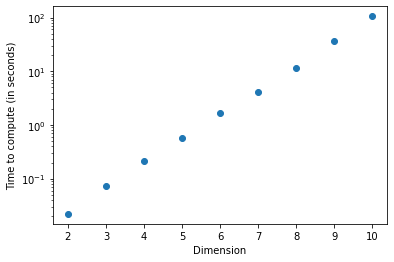

In [6]:
fig, ax = plt.subplots()
plt.scatter(dim_vec, time_dim)
poly = np.poly1d(np.polyfit(np.log(dim_vec),np.log(time_dim),2))
# x=np.linspace(2,max_dim,50)
# y = np.exp(poly(np.log(x)))
ax.set_yscale('log')
# plt.plot(x,y, color='r', label="Sub-polynomial regression : {}".format(poly))
plt.xlabel("Dimension")
plt.ylabel("Time to compute (in seconds)")
plt.savefig(f"time_vs_dimension_npts_{npts}_precision_{precision}.svg")
# plt.legend()
plt.show()
